# **Market Basket Analysis**
Market basket analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari market basket analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan

## **Algoritma Apriori**

Algoritma Apriori adalah suatu algoritma dasar yang diusulkan oleh Agrawal & Srikant pada tahun 1994 untuk penentuan frequent itemsets untuk aturan asosiasi boolean. Algoritma Apriori memberi kita sifat asosiatif dalam transaksi. Ini juga dikenal sebagai Aturan Asosiasi. Aturan asosiasi atau association rule adalah teknik untuk menemukan aturan asosiasi antara suatu kombinasi item. Terdapat 3 metrik untuk mengukur ketepatan aturan, yaitu :


### **1. Support**
Support adalah indikasi seberapa sering kumpulan item muncul pada dataset. Berikut perhitungan nilai support :

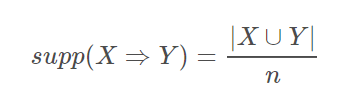

### **2. Confidence**
Confidence adalah suatu ukuran yang menunjukkan hubungan antar dua item secara conditional (berdasarkan suatu kondisi tertentu). Berikut perhitungan nilai confidence :

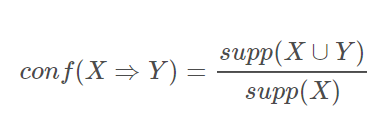

### **3. Lift**
Lift mengacu pada bagaimana peluang kedua item dibeli ketika item pertama dibeli. Berikut perhitungan nilai confidence :
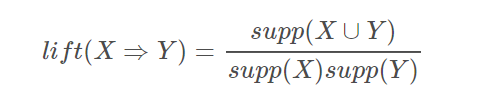



---



# **Bakery Market Basket Analysis**

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**
Kita akan menggunakan data BreadBasket_DMS.csv yang bisa temen-temen download [disini](https://github.com/viktree/curly-octo-chainsaw/blob/ea4fbb632382c44af0d0b53c90f4e04496926b94/BreadBasket_DMS.csv)

Sekarang import data ke DataFrame dengan library pandas.

In [ ]:
!wget https://raw.githubusercontent.com/viktree/curly-octo-chainsaw/ea4fbb632382c44af0d0b53c90f4e04496926b94/BreadBasket_DMS.csv -O data

--2023-06-17 13:26:31--  https://raw.githubusercontent.com/viktree/curly-octo-chainsaw/ea4fbb632382c44af0d0b53c90f4e04496926b94/BreadBasket_DMS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 710518 (694K) [text/plain]
Saving to: ‘data’

data                100%[===================>] 693.87K  --.-KB/s    in 0.02s   

2023-06-17 13:26:31 (36.6 MB/s) - ‘data’ saved [710518/710518]



In [ ]:
data = pd.read_csv('data')
data

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


Dari tabel diatas, menunjukkan jumlah data pada dataset terdapat 21293 baris dan 4 kolom

## **3. Data Preparation**
Pada tahapan ini kita akan memastikan tipe data yang digunakan sesuai, tidak ada nilai kosong

In [ ]:
# cek tipe data dari setiap kolom
data.dtypes


Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [ ]:
# mencetak 10 data pertama
data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [ ]:
#Mencetak jumlah data item yang unik (memiliki nilai item berbeda)
print("Jumlah item unik:", data['Item'].nunique())

Jumlah item unik: 95


In [ ]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Data item unik: ',data['Item'].unique())

Data item unik:  ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry sho

In [ ]:
# Cek missing value dan zeros
missing_values = data.isna().sum()
print(missing_values)

Date           0
Time           0
Transaction    0
Item           0
dtype: int64


Terlihat bahwa pada dataset tidak terdapat missing value dan zeros

In [ ]:
# cek nilai "NONE" pada kolom Item
data = data[data['Item'] != "NONE"]
print(data)

             Date      Time  Transaction           Item
0      2016-10-30  09:58:11            1          Bread
1      2016-10-30  10:05:34            2   Scandinavian
2      2016-10-30  10:05:34            2   Scandinavian
3      2016-10-30  10:07:57            3  Hot chocolate
4      2016-10-30  10:07:57            3            Jam
...           ...       ...          ...            ...
21288  2017-04-09  14:32:58         9682         Coffee
21289  2017-04-09  14:32:58         9682            Tea
21290  2017-04-09  14:57:06         9683         Coffee
21291  2017-04-09  14:57:06         9683         Pastry
21292  2017-04-09  15:04:24         9684      Smoothies

[20507 rows x 4 columns]


Terdapat nilai 'NONE' di dataset kita. Ini bisa berarti bahwa ada item yang tidak dibeli, atau nama item tersebut tidak dicatat. Terdapat 786 data dengan nilai "None" dari total 21293. Karena data ini tidak berguna, maka bisa kita hapus saja.

In [ ]:
# menghapus baris dengan nilai Item = None
dataa = data[data['Item'] != 'NONE']

In [ ]:
# cek perubahan yang terjadi
dataa[dataa['Item']=="NONE"]

,Date,Time,Transaction,Item


Seperti yang bisa kita lihat di atas, fitur Tanggal dan Waktu bukanlah tipe numerik. Untuk visualisasi dan pemahaman data yang lebih baik, kita bisa menambahkan beberapa fitur lagi ke DataFrame ini berdasarkan informasi dari dua fitur ini.

In [ ]:
# Year
dataa['Year'] = dataa['Date'].apply(lambda x: x.split("-")[0])
# Month
dataa['Month'] = dataa['Date'].apply(lambda x: x.split("-")[1])
# Day
dataa['Day'] = dataa['Date'].apply(lambda x: x.split("-")[2])

In [ ]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(dataa.info())
print(dataa.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None
         Date      Time  Transaction           Item  Year Month Day
0  2016-10-30  09:58:11            1          Bread  2016    10  30
1  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
2  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
3  2016-10-30  10:07:57            3  Hot chocolate  2016    10  30
4  2016-10-30  10:07:57            3            Jam  2016    10  30


## **4. Visualisasi dan Memahami Data**
Kita tahu bahwa dataset ini direkam dari 30/10/2016 hingga 09/04/2017. Sebelum kita masuk dalam pemodelan, kita harus mengeksplorasi dan memvisualisasikan penjualan dalam periode waktu ini. Barang apa yang paling banyak dibeli pelanggan? Bulan mana yang lebih sukses? Mari kita jawab ini secara visual.


In [ ]:
most_sold = dataa['Item'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Item, dtype: int64


In [ ]:
transaction_count = dataa.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184


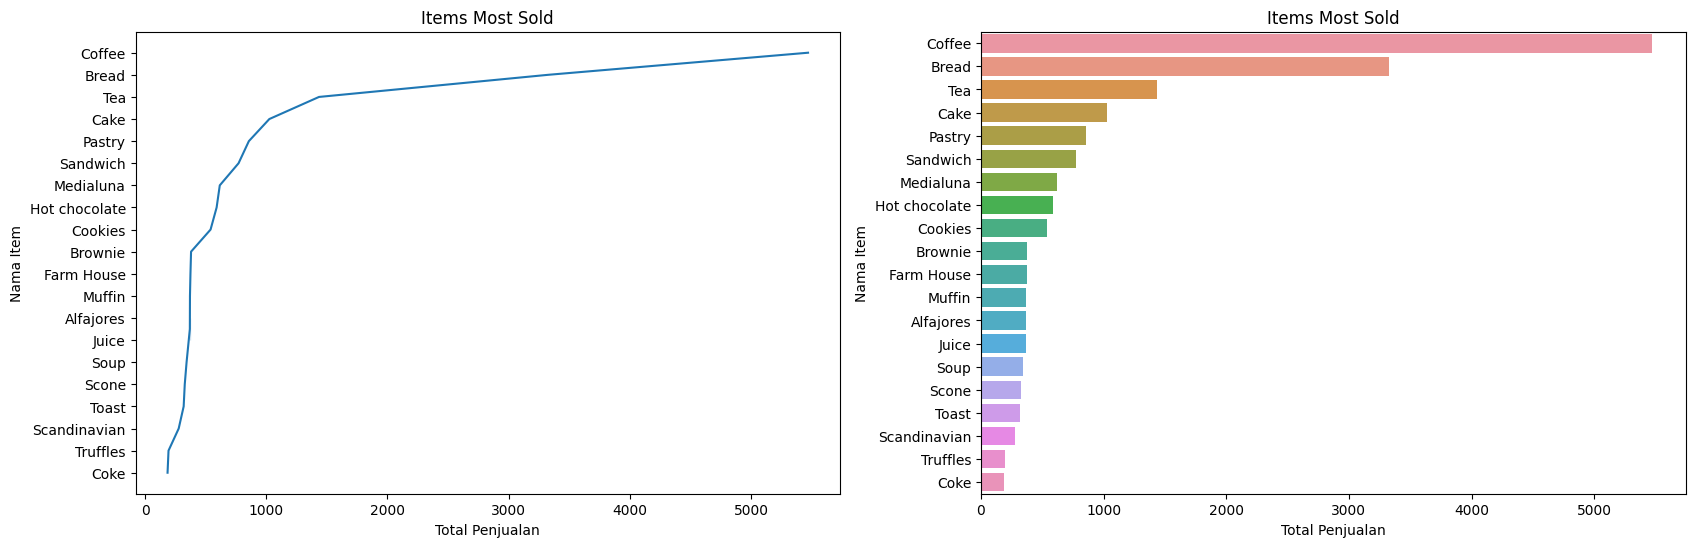

In [ ]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.lineplot(y=most_sold.index, x=most_sold.values)
plt.xlabel('Total Penjualan')
plt.ylabel('Nama Item')
#plt.plot(most_sold)
plt.title('Items Most Sold')

plt.subplot(1,2,2)
sns.barplot(y=most_sold.index, x=most_sold.values)
plt.xlabel('Total Penjualan')
plt.ylabel('Nama Item')

plt.title('Items Most Sold')
plt.show()

Berdasarkan hasil visualisasi, sebutkan 3 barang yang paling banyak terjual !
=>


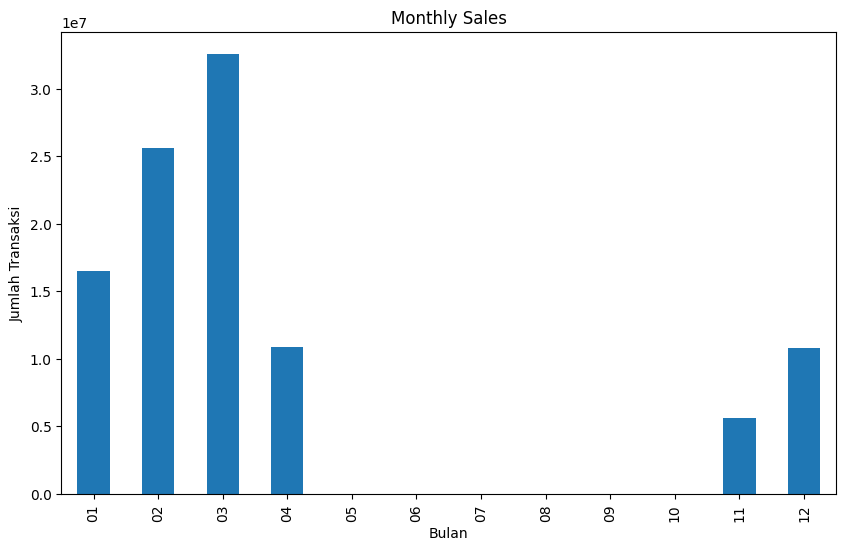

In [ ]:
#buat visualisasi data diagram batang dengan judul 'Monthly Sales' dengan sumbu x bulan dan sumbu y jumlah transaksi
monthly_sales = dataa.groupby('Month')['Transaction'].sum().reindex(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
monthly_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.title('Monthly Sales')
plt.show()

Dari hasil visualisasi data penjualan perbulan, terlihat terjadi perbedaan penjualan yang drastis pada bulan 4 dan 10. Ini disebut dengan outlier.
Untuk mengetahui lebih lanjut, kita bisa periksa untuk melihat apakah ada lebih sedikit transaksi harian yang dicatat untuk bulan-bulan ini dibandingkan dengan yang lain.

In [ ]:
print(dataa.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


Pada Bulan 4 hanya tercatat 9 hari dan pada bulan  10 hanya tercatat 2 hari

## **5. Market Basket Analysis**

Pertama kita mengubah item list menjadi data transaksi dengan menggunakan TransactionEncoder.
Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori.


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

kita membuat list transaction_list() yang unik sehingga kita dapat mengubah data kita ke dalam format yang benar

In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in dataa['Transaction'].unique():
    tlist = list(set(dataa[dataa['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


kita menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
dataa = pd.DataFrame(te_ary, columns=te.columns_)

Sekarang kita terapkan Apriori. Kita akan menggunakan parameter min_threshold (nilai ambang batas yang ditentukan) dalam aturan asosiasi untuk metrik lift menjadi 1,0 karena jika kurang dari satu, maka kedua item tersebut kemungkinan tidak akan dibeli bersama. Kita akan mengurutkan nilai berdasarkan keyakinan untuk melihat kemungkinan suatu barang dibeli jika pendahulunya dibeli.

In [ ]:
frequent_itemsets = apriori(dataa, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
matrix = pd.DataFrame(rules)
matrix[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
40,(Cake),"(Coffee, Tea)",0.010037,0.096643,1.937977
39,"(Coffee, Tea)",(Cake),0.010037,0.201271,1.937977
8,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
9,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
11,(Tea),(Cake),0.023772,0.166667,1.604781
10,(Cake),(Tea),0.023772,0.228891,1.604781
30,(Coffee),(Toast),0.023666,0.049470,1.472431
31,(Toast),(Coffee),0.023666,0.704403,1.472431
37,(Pastry),"(Coffee, Bread)",0.011199,0.130061,1.444872
36,"(Coffee, Bread)",(Pastry),0.011199,0.124413,1.444872


# **Kesimpulan**

Jelaskan makna tabel di atas berdasar nilai-nilai metrik (support, confidence, dan lift)!

Tabel di atas adalah hasil dari analisis aturan asosiasi menggunakan algoritma Apriori, yang dapat membantu kita menemukan pola dan hubungan antara item atau variabel dalam dataset.

Metrik yang digunakan dalam tabel tersebut adalah support, confidence, dan lift:

1. Support mengukur seberapa sering kombinasi antecedents dan consequents muncul dalam dataset. Nilai support menunjukkan proporsi transaksi yang mengandung kombinasi tersebut. Semakin tinggi nilai support, semakin umum kombinasi tersebut muncul dalam transaksi.

2. Confidence mengukur seberapa sering item dalam consequents muncul saat item antecedents muncul. Nilai confidence menunjukkan sejauh mana item consequents tergantung pada item antecedents. Semakin tinggi nilai confidence, semakin kuat hubungan antara item-item tersebut.

3. Lift mengukur kekuatan asosiasi antara antecedents dan consequents. Lift membandingkan frekuensi pengamatan yang mengandung antecedents dan consequents bersama dengan frekuensi yang diharapkan jika keduanya independen. Nilai lift di atas 1 menunjukkan adanya asosiasi positif antara item-item tersebut. Lift yang sama dengan 1 menunjukkan ketiadaan asosiasi, sedangkan lift di bawah 1 menunjukkan adanya asosiasi negatif.

Berdasarkan tabel tersebut, terdapat beberapa kombinasi item set dengan nilai lift yang tinggi, tetapi memiliki support dan confidence yang rendah. Hal ini menunjukkan bahwa kombinasi tersebut muncul sangat jarang dalam dataset, dan hubungan antara item antecedents dan consequents tidak dapat dipastikan. Dalam kasus ini, meskipun terdapat asosiasi yang kuat, tidak dapat diandalkan secara signifikan karena jarang terjadi.

Di sisi lain, terdapat beberapa kombinasi item set dengan rentang skor lift antara 1.0 hingga 1.2. walau asosiasi dalam kombinasi ini cukup lemah, support dan confidence-nya memiliki nilai yang tinggi. Hal ini menunjukkan bahwa kombinasi item set tersebut sering muncul dalam transaksi dan antecedents cenderung diikuti oleh consequents. Meskipun hubungannya lemah, kejadian ini terjadi dengan cukup frekuensi.

Pada kombinasi item set dengan rentang skor lift antara 1.2 hingga 1.7, terlihat bahwa mereka memiliki kekuatan asosiasi yang lebih tinggi. Namun, mirip dengan kombinasi item set sebelumnya, mereka juga jarang muncul dalam transaksi pelanggan.

Meskipun ada kombinasi item set dengan nilai lift tinggi, penting untuk memperhatikan juga support dan confidence mereka. Kombinasi item set dengan lift tinggi tetapi support dan confidence rendah mungkin tidak cukup signifikan karena jarang terjadi dalam transaksi. Sebaliknya, kombinasi item set dengan rentang skor lift antara 1.2 hingga 1.7 menunjukkan kekuatan asosiasi yang lebih tinggi, tetapi juga jarang muncul dalam dataset.